In [18]:
%load_ext autoreload
%autoreload 2
import math
import pandas as pd
import numpy as np
import seaborn as sns
import statistics
import scipy
import scipy.stats as st
import matplotlib.pyplot as plt
%matplotlib inline

import data_cleaning  as dc
import hypothesis_tests as ht
import visualizations

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Reading in the data and begin cleaning

In [2]:
# Read in data as pandas dataframe

df=pd.read_csv("2016_2019_USmovies_API.csv")
df.head()

# Check what our column titles are so we can rename/remove them
df.columns

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2015 entries, 0 to 2014
Data columns (total 22 columns):
tconst                      2015 non-null object
titleType                   2015 non-null object
primaryTitle                2015 non-null object
originalTitle               2015 non-null object
isAdult                     2015 non-null int64
startYear                   2015 non-null int64
endYear                     2015 non-null object
runtimeMinutes              2015 non-null int64
genres                      2015 non-null object
title                       2015 non-null object
check                       2015 non-null int64
averageRating               2015 non-null float64
numVotes                    2015 non-null int64
budget_LCY                  1004 non-null object
gross_USA_USD               1085 non-null float64
cumm_worldwide_gross_USD    1386 non-null float64
Released_Date               2005 non-null object
Released_Month              2005 non-null float64
Rotten_Tomat

In [10]:
# Let's clean the data and rename columns so we know what we're looking 

columns=["tconst","title","isAdult","startYear","runtimeMinutes","check","averageRating","genres","numVotes",
         "budget_LCY","gross_USA_USD","cumm_worldwide_gross_USD",]
names=["Title_ID","Title","Adult","Release_Year","Runtime(Minutes)","Check","Rating","Genre","Number_of_Votes",
      "Budget(LCY)","USA_Gross($)","Worldwide_Gross($)"]

# Cleaning function from library

dc.rename_columns(columns,names,df)

df.head()

,Title_ID,titleType,primaryTitle,originalTitle,Adult,Release_Year,endYear,Runtime(Minutes),Genre,Title,...,Number_of_Votes,Budget(LCY),USA_Gross($),Worldwide_Gross($),Released_Date,Released_Month,Rotten_Tomatoes,Metascore,Actors,Production
0,tt0069049,movie,The Other Side of the Wind,The Other Side of the Wind,0,2018,\N,122,Drama,The Other Side of the Wind,...,4989,NaN,NaN,NaN,02 Nov 2018,11.0,83.0,78.0,"John Huston, Oja Kodar, Peter Bogdanovich, Sus...",Netflix
1,tt0339736,movie,The Evil Within,The Evil Within,0,2017,\N,98,Horror,The Evil Within,...,2572,$6000000,NaN,NaN,30 Aug 2017,8.0,100.0,NaN,"Sean Patrick Flanery, Dina Meyer, Frederick Ko...",NaN
2,tt0360556,movie,Fahrenheit 451,Fahrenheit 451,0,2018,\N,100,"Drama,Sci-Fi,Thriller",Fahrenheit 451,...,15295,NaN,NaN,NaN,20 May 2018,5.0,32.0,NaN,"Michael B. Jordan, Aaron Davis, Cindy Katz, Mi...",HBO Films
3,tt0365545,movie,Nappily Ever After,Nappily Ever After,0,2018,\N,98,"Comedy,Drama,Romance",Nappily Ever After,...,6718,NaN,NaN,NaN,21 Sep 2018,9.0,71.0,63.0,"Sanaa Lathan, Ricky Whittle, Lyriq Bent, Lynn ...",Netflix
4,tt0369610,movie,Jurassic World,Jurassic World,0,2015,\N,124,"Action,Adventure,Sci-Fi",Jurassic World,...,549806,$150000000,652.27,1670.4,12 Jun 2015,6.0,72.0,59.0,"Chris Pratt, Bryce Dallas Howard, Irrfan Khan,...",Universal Pictures


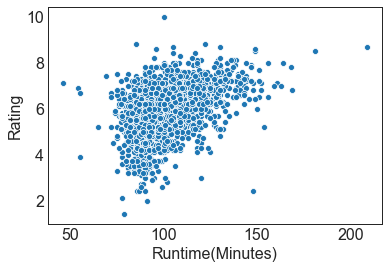

In [11]:
df.columns
sns.scatterplot(data=df,x="Runtime(Minutes)",y="Rating")

In [19]:
# Now to drop columns we aren't interested in or that hold irrelevant data

columns_to_drop=["titleType","primaryTitle","originalTitle","endYear","Adult","Check"]

dc.drop_columns(df,columns_to_drop)

# Save as csv
# df.to_csv("Full_OMDB_Table.csv",index=False)

In [17]:
df.columns

Index(['Title_ID', 'Release_Year', 'Runtime(Minutes)', 'Genre', 'Title',
       'Rating', 'Number_of_Votes', 'Budget(LCY)', 'USA_Gross($)',
       'Worldwide_Gross($)', 'Released_Date', 'Released_Month',
       'Rotten_Tomatoes', 'Metascore', 'Actors', 'Production'],
      dtype='object')

In [11]:
# Now to check our data makes sense and we have no nulls
print(df.describe())
print(df.info())
print(df.shape)

       Release_Year  Runtime(Minutes)       Rating  Number_of_Votes  \
count   2015.000000       2015.000000  2015.000000      2015.000000   
mean    2016.715633        101.181141     5.920447     42005.702233   
std        1.355422         15.783114     1.051272     91376.330598   
min     2014.000000         46.000000     1.400000       984.000000   
25%     2016.000000         90.000000     5.300000      2377.500000   
50%     2017.000000         98.000000     6.000000      7601.000000   
75%     2018.000000        109.000000     6.600000     36685.500000   
max     2019.000000        209.000000    10.000000    844981.000000   

       USA_Gross($)  Worldwide_Gross($)  Released_Month  Rotten_Tomatoes  \
count   1085.000000         1386.000000     2005.000000      1522.000000   
mean      46.304341           91.579856        6.684788        55.818660   
std       91.560188          225.040751        3.378692        28.335085   
min        0.000000            0.000000        1.000000 

## Subset our data to what we're interested in.
Since we will be looking at genres we want to see what different genres we have and split these into different categories. We will also be interested in the production company -> IE Netflix

In [12]:
df.columns

Index(['Title_ID', 'Release_Year', 'Runtime(Minutes)', 'Genre', 'Title',
       'Rating', 'Number_of_Votes', 'Budget(LCY)', 'USA_Gross($)',
       'Worldwide_Gross($)', 'Released_Date', 'Released_Month',
       'Rotten_Tomatoes', 'Metascore', 'Actors', 'Production'],
      dtype='object')

In [29]:
# Drop columns which contain nulls as they aren't relevant to ratings and also average our 3 ratings
# We will drop rotten tomatoes scores as the user base is far smaller than imdb and will skew our results.
# Metascore is also not comparable as these are not user based scores they are weighted critic reviews
# We will compare the scores for each of these platforms in another section

df_ratings=df.drop(columns=["Released_Month","Released_Date","Rotten_Tomatoes","Metascore"])


In [34]:
# Now split into separate databases based on genre

df_comedy=df_ratings.loc[df_ratings["Genre"]=="Comedy",:]
df_drama=df_ratings.loc[df_ratings["Genre"]=="Drama",:]
df_horror=df_ratings.loc[df_ratings["Genre"]=="Horror",:]
df_scifi=df_ratings.loc[df_ratings["Genre"]=="Sci-Fi",:]
df_action=df_ratings.loc[df_ratings["Genre"]=="Action",:]
df_romance=df_ratings.loc[df_ratings["Genre"]=="Romance",:]
df_adventure=df_ratings.loc[df_ratings["Genre"]=="Adventure",:]


# Print shape of dataframe so we know the sample sizes

print("There are ",len(df_drama),"Drama movies in this dataset")
print("There are ",len(df_comedy),"Comedy movies in this dataset")
print("There are ",len(df_horror)," Horror movies in this dataset")
print("There are ",len(df_action),"  Action movies in this dataset")
print("There are ",len(df_scifi),"  Sci-Fi movies in this dataset")
print("There are ",len(df_romance),"  Romance movies in this dataset")
print("There are ",len(df_adventure),"  Adventure movies in this dataset")


There are  112 Drama movies in this dataset
There are  101 Comedy movies in this dataset
There are  64  Horror movies in this dataset
There are  7   Action movies in this dataset
There are  4   Sci-Fi movies in this dataset
There are  3   Romance movies in this dataset
There are  0   Adventure movies in this dataset


## Now we need to plot our data to check for normality

/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


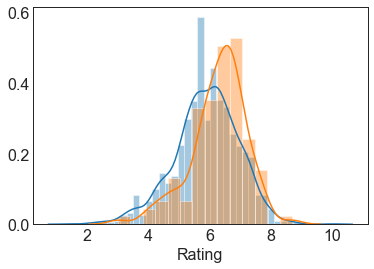

In [35]:
# We can see the above genres are statistically different from each other, so genres definatelyaffect the rating.
# As drama has the highest rating, we now want to know if it statistically different from the population, thereby saying
# drama films do garner a better rating, and can advise which is the genre most likely to be a success.


# Remove our sample set from the population so it doesn't skew our mean and plot against each other.

df_no_drama=df_ratings.loc[df_ratings["Genre"]!="Drama",:]

sns.distplot(df_no_drama.Rating)
sns.distplot(df_drama.Rating)

# sns.distplot(df_comedy.Rating)
# sns.distplot(df_horror.Rating)
# sns.distplot(df_scifi.Rating)
# sns.distplot(df_action.Rating)
# sns.distplot(df_romance.Rating)

In [39]:
print("For the population the standard deviation is:",round(df_no_drama.Rating.std(),3)," with a median value of:",round(df_no_drama.Rating.median(),3)," and a mean value of:",round(df.Rating.mean(),3))
print("For Drama the standard deviation is:",round(df_drama.Rating.std(),3)," with a median value of:",round(df_drama.Rating.median(),3)," and a mean value of:",round(df_drama.Rating.mean(),3))

For the population the standard deviation is: 1.055  with a median value of: 6.0  and a mean value of: 5.92
For Drama the standard deviation is: 0.917  with a median value of: 6.4  and a mean value of: 6.292


In [40]:
print("The drama movies sample set is not normal given: ",st.normaltest(df_drama.Rating),"\n It has ",len(df_drama)," values.")
print("The rest of the data is not normal given: ",st.normaltest(df_no_drama.Rating),"\n It has ",len(df_no_drama)," values.")

The drama movies sample set is not normal given:  NormaltestResult(statistic=15.285855141424646, pvalue=0.00047942285126625054) 
 It has  112  values.
The rest of the data is not normal given:  NormaltestResult(statistic=58.066922240332374, pvalue=2.459959997803095e-13) 
 It has  1903  values.


## Improve our data set such that it is normal and we can perform our tests!

NormaltestResult(statistic=0.43102232230149196, pvalue=0.8061292728775716)


/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


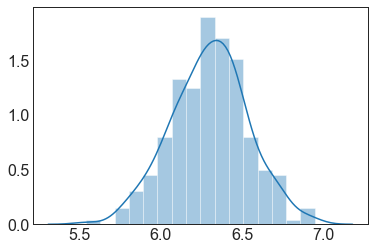

In [41]:
drama_normal=ht.create_sample_distribution(df_drama.Rating,300,n=15)
sns.distplot(drama_normal)
print(st.normaltest(drama_normal))

NormaltestResult(statistic=1.02446147076803, pvalue=0.599157525053464)


/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


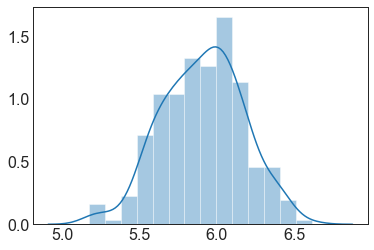

In [42]:
no_drama_normal=ht.create_sample_distribution(df_no_drama.Rating,300,n=15)
sns.distplot(no_drama_normal)
print(st.normaltest(no_drama_normal))

/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


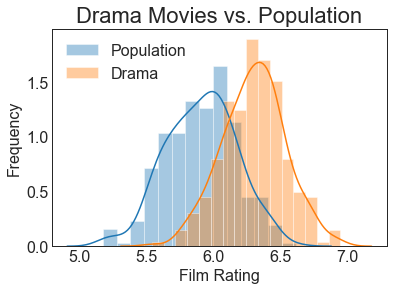

In [43]:
a = sns.distplot(no_drama_normal,label="Population").set_title("Drama Movies vs. Population").get_figure().savefig("Drama_vs_Popluation.png")
b = sns.distplot(drama_normal,label="Drama")
plt.xlabel("Film Rating")
plt.ylabel("Frequency")
plt.legend()
plt.show()

In [44]:
print("For the population the standard deviation is:",round(statistics.pstdev(no_drama_normal),3)," with a median value of:",round(statistics.median(no_drama_normal),3)," and a mean value of:",round(statistics.mean(no_drama_normal),3))

print("For Drama the standard deviation is:",round(statistics.stdev(drama_normal),3)," with a median value of:",round(statistics.median(drama_normal),3)," and a mean value of:",round(statistics.mean(drama_normal),3))


For the population the standard deviation is: 0.261  with a median value of: 5.927  and a mean value of: 5.909
For Drama the standard deviation is: 0.235  with a median value of: 6.3  and a mean value of: 6.3


Test 1: one sample z-test for Drama movies against the population.

In [64]:
alpha =  0.05                                   # The alpha value - likelihood to avoid a Type 1 error

ht.z_test(drama_normal, no_drama_normal, alpha)               # Using the z-test from our library

The z-statistic is 25.968, which corresponds to a p-value of 0.0.
The effect size, cohen's d = 1.575.
From this we Reject the null hypothesis


Therefore the difference in rating between Drama and the population is significant with a large effect size!

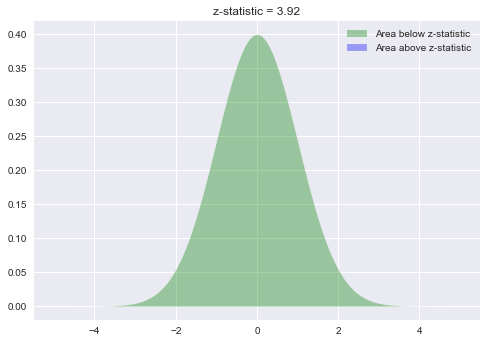

In [46]:
# Visualize the difference

plt.style.use('seaborn')
plt.fill_between(x=np.arange(-5,3.92,0.01),
                 y1= st.norm.pdf(np.arange(-5,3.92,0.01)),
                 facecolor='green',
                 alpha=0.35,
                 label= 'Area below z-statistic'
                 )

plt.fill_between(x=np.arange(3.92,5,0.01), 
                 y1= st.norm.pdf(np.arange(3.92,5,0.01)),
                 facecolor='blue',
                 alpha=0.35, 
                 label= 'Area above z-statistic')
plt.legend()
plt.title ('z-statistic = 3.92');

## Does the rating of each genre differ from each other?
### What is the best genre to choose to maximise rating?

In this section we will perform a simple one-way ANOVA just to see if our main 3 genres difference in rankings is statistically significant. From this and the accompanying visualization, we will then see if Drama (our highest ranking genre) garners a higher rating than the average movie (IE compared to the population of all genres other than Drama). The reason for this approach is so we can see which genre would be best to make a movie for.

Our hypothesis is that there will be a signifcant difference between genres and that drama will be the best performing, such that the rating of drama films is higher than the average rating for the population.
Our Null is that there is no difference.

### Performing a simple one-way ANOVA for our 3 main genres...
The aim of this is to see whether the difference in ratings between genres is signifcantly different.
If so, we will we be interested in to see the how drama performs against the population. We will not perform ad-hoc comparisons between genres as we are not interested in which specific combinations are signifcant but rather just interested in seeing if any observed difference is real.

In [47]:
# Can we perform an ANOVA on our data for 3 main title types to see if statistically different?
# sample sizes vary between all genres so choosing the top 3 and will take n=50

comedy=df_comedy.Rating.sample(n=50)
drama=df_drama.Rating.sample(n=50)
horror=df_horror.Rating.sample(n=50)

# Concat tables together to plot boxplots on same graph
df_cdh=df_ratings.loc[((df_ratings["Genre"]=="Comedy")|(df_ratings["Genre"]=="Drama")|(df_ratings["Genre"]=="Horror")),:]

/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


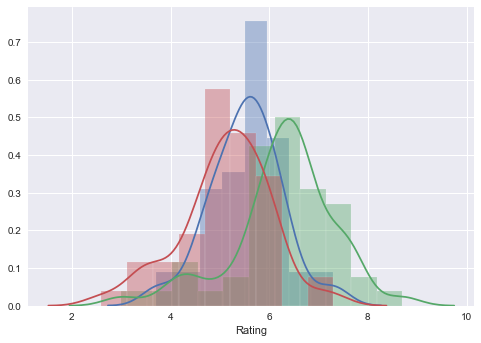

In [48]:
sns.distplot(comedy)   # Blue
sns.distplot(drama)    # Green
sns.distplot(horror)   # Red

/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


NormaltestResult(statistic=6.05835527266188, pvalue=0.04835538749348774)


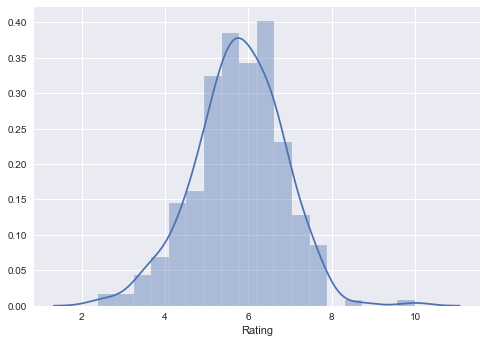

In [49]:
sns.distplot(df_cdh.Rating)
print(st.normaltest(df_cdh.Rating))

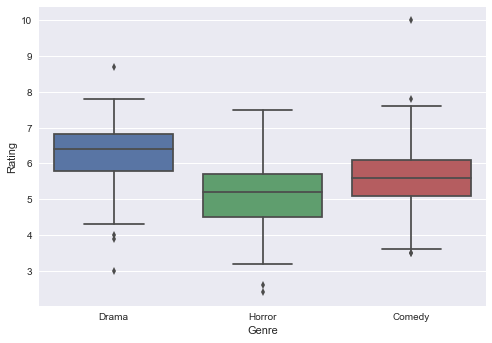

In [50]:
# Let's plot the different sample sizes to observe the variance and mean values

sns.boxplot(data=df_cdh,y="Rating",x="Genre")

In [79]:
# Now perform a on-way ANOVA test for these random samples

anova=scipy.stats.f_oneway(comedy,drama,horror)     # Very small P-value and large F -> signifcant difference between genres

ht.significance(anova[1],alpha)

'We reject the null as our p-value (1.2067323535983743e-08) is less than our alpha (0.05) so we can say this result is signifcant.'

## How do Netflix films compare to the population?
In this section we will use a Welch's T-Test as our variance in the Netflix subset and population do not have equal variance (as are not uniform) so this test will be more appropriate without having to normalise our dataset as we did previously. 

Our hypothesis is that Netflix films will perform better or worse than the population - IE they will differ in rating.
Our null is that there is no difference between Netflix films and the population.

In [66]:
# How many films does Netflix have here and how many are drama?
print("Netflix has ",len(df_ratings.loc[df_ratings["Production"]=="Netflix",:])," films in total.")
print("Netflix has ",len(df_ratings.loc[(df_ratings["Production"]=="Netflix")&(df_ratings["Genre"]=="Drama"),:]),"  Drama films.")

Netflix has  122  films in total.
Netflix has  10   Drama films.


In [67]:
df_ratings.info()
df_ratings.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2015 entries, 0 to 2014
Data columns (total 12 columns):
Title_ID              2015 non-null object
Release_Year          2015 non-null int64
Runtime(Minutes)      2015 non-null int64
Genre                 2015 non-null object
Title                 2015 non-null object
Rating                2015 non-null float64
Number_of_Votes       2015 non-null int64
Budget(LCY)           1004 non-null object
USA_Gross($)          1085 non-null float64
Worldwide_Gross($)    1386 non-null float64
Actors                2015 non-null object
Production            1678 non-null object
dtypes: float64(3), int64(3), object(6)
memory usage: 189.0+ KB


Index(['Title_ID', 'Release_Year', 'Runtime(Minutes)', 'Genre', 'Title',
       'Rating', 'Number_of_Votes', 'Budget(LCY)', 'USA_Gross($)',
       'Worldwide_Gross($)', 'Actors', 'Production'],
      dtype='object')

In [67]:
df_netflix = df_ratings.loc[df_ratings["Production"]=="Netflix",:]
df_rest    = df_ratings.loc[df_ratings["Production"]!="Netflix",:]

/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


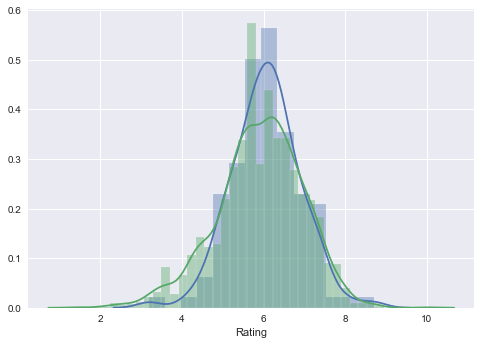

In [68]:
sns.distplot(df_netflix.Rating)
sns.distplot(df_rest.Rating)

In [69]:
print(df_rest.Rating.std(),df_rest.Rating.mean())
print(df_netflix.Rating.std(),df_netflix.Rating.mean())


1.0629724003438397 5.911251980982567
0.8400315637194714 6.06311475409836


NormaltestResult(statistic=0.19956478582927786, pvalue=0.9050343384940904)


/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


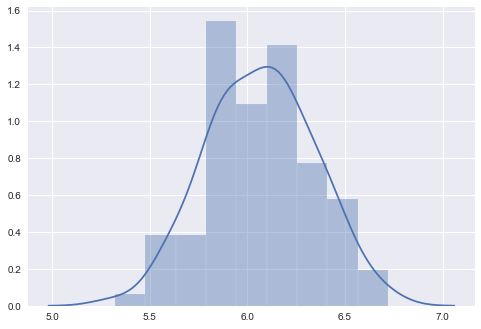

In [70]:
netflix_normal=ht.create_sample_distribution(df_netflix.Rating,100,n=10)
sns.distplot(netflix_normal)
print(st.normaltest(netflix_normal))

NormaltestResult(statistic=0.03035306754413554, pvalue=0.9849380494256516)


/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


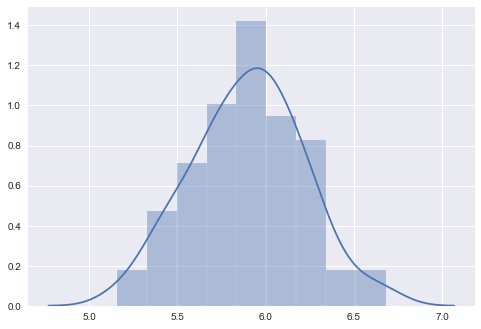

In [71]:
rest_normal=ht.create_sample_distribution(df_rest.Rating,100,n=10)
sns.distplot(rest_normal)
print(st.normaltest(rest_normal))

/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


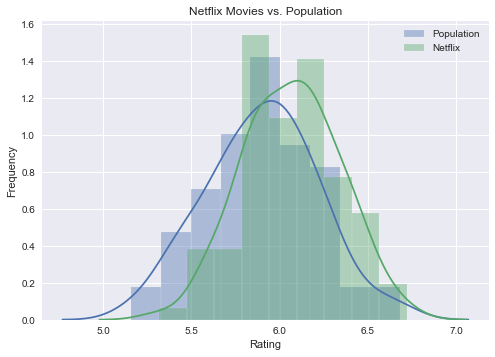

In [72]:
a=sns.distplot(rest_normal,label="Population").set_title("Netflix Movies vs. Population").get_figure().savefig("Netflix_vs_Popluation.png")
b=sns.distplot(netflix_normal,label="Netflix")
plt.xlabel("Rating")
plt.ylabel("Frequency")
plt.legend()
plt.show()



In [73]:
print(len(rest_normal))
len(netflix_normal)

100


100

In [74]:
z_netflix = ht.z_test(df_netflix.Rating,df_rest.Rating,alpha)       
z_netflix

The z-statistic is 1.578, which corresponds to a p-value of 0.05723398481491715.
The effect size, cohen's d = 0.159.
From this we Fail to reject the null hypothesis


### Perform Welch's T-Test

In [78]:
# We can perform a welchs t-test in one line using scipy.stats

t_stat, p_value = st.ttest_ind(df_netflix.Rating, df_rest.Rating, equal_var=False)

print(f"This gives us a t-statistic of {round(t_stat,3)}, and a corresponding p-value of {round(p_value,3)}")
ht.significance(p_value,alpha)


This gives us a t-statistic of 1.901, and a corresponding p-value of 0.059


'Fail to reject the null as our p-value (0.059) is greater than our alpha (0.05) so the test is not signifcant.'

### Calculate Degrees of Freedom